<a href="https://colab.research.google.com/github/bhargavasomya/Ghana-Traffic/blob/master/QPID_ML_DS_Challenge_Somya_Bhargava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**QPID Machine Learning/Data Science Challenge**

>[QPID Machine Learning/Data Science Challenge](#scrollTo=0rfF7yE_Nzsx)

>>[Introduction](#scrollTo=rm6JUOo3PkQ3)

>>>[Problem Statement](#scrollTo=tcXSWw-895ez)

>>[Details](#scrollTo=GZh7-oC8ELQh)

>>>[Downloading the Dataset](#scrollTo=NkkA0ZzePwI8)

>>>[Dataset Description](#scrollTo=mEXwMJQ-VWoR)

>>>[Hints](#scrollTo=Tg8y-zLlxZNQ)

>>>[Import Libraries](#scrollTo=JBt8Ino7PGDz)

>>>[Code Samples](#scrollTo=i38zIcCZXg33)

>>[Tasks](#scrollTo=TJTdm_qNYqqb)

>>>[Part 1: Modeling](#scrollTo=2hcyIkRSXg82)

>>>[Part 2: Additional Questions](#scrollTo=8VSLpzIMXg_a)



## Introduction

We'd like to get a better sense of your approach to and intuition for machine learning, natural language processing, data science, as well as your other technical and analytical skills. To that end, we'd like you to complete this ML challenge. 

In this challenge, we provide you with some code samples using `pandas` and `scikit-learn`. You may use other python libraries as well as reference online resources to complete this challenge.

This is an interactive Jupyter notebook that allows you to write, comment on, and execute python code directly on Google's servers. If you are new to Jupyter notebooks, you can read more about them here: [https://jupyter.org/](https://jupyter.org/). **Please edit this notebook directly** and take as much time as you feel is reasonable to complete this exercise. 



**Please email eyadgaran@evicore.com when you are done so that we can review the changes you've made to this notebook.**

### Problem Statement
The goal of this notebook is to develop a model that predicts whether self-reported severity of [fibromyalgia](https://en.wikipedia.org/wiki/Fibromyalgia) **IMPROVED**, **WORSENED**, or stayed the **SAME** over a variable period of time for patients who have this condition. Below are instructions about how to download the data, as well as some sample code that generates such predictions. 

**Your goal is to improve on this model and show us how you think through such a problem.**


## Tasks

This challenge consists of two parts: modeling and addressing additional questions. The first part is to train a model and predict the change in status of fibromyalgia. The second part is to answer some questions in regards to your approach. 


### Part 1: Modeling



1.   We will evaluate your results on a held-out test set. Therefore, please make sure that your code is clearly documented, so that we can easily run **your code** against our test set. The test set is formatted exactly the same as the dataset set we provided. **You will not be judged solely on the performance of the model.** We are also interested in your creativity and problem solving approach.  
2.   Please report on how well the model did. You may choose to whatever metrics you find appropriate.


### Part 2: Additional Questions

Please answer the following questions at the bottom of the notebook when you have completed part 1:

1.   If you've explored the data, please describe your observations about the dataset. 
2.   What approach (i.e. modeling & evaluation) did you use?
3.   What features have you tried (please also include the ones that you do not include in your final model)?
4.   Why did you use this approach?
5.   How would you improve your model if you had more time?



## The Dataset

### Downloading the Dataset

The following is a function to download the datasets and then import it as a pandas `DataFrame` object. 

You may need to sign in with your Google account when prompted.

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import io
import json
import numpy as np

In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
def download_dataset(file_id):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Download a file based on its file ID.
  downloaded = drive.CreateFile({'id': file_id})
  content = downloaded.GetContentString()
  
  return pd.read_csv(io.StringIO(content))
  

### Dataset Description

The dataset you will be using is a subset of the Chronic Illness dataset on Kaggle: https://www.kaggle.com/flaredown/flaredown-autoimmune-symptom-tracker



Flaredown is an app that helps patients of chronic autoimmune and invisible illnesses improve their symptoms by avoiding triggers and evaluating their treatments. Each day, patients track their symptom severity, treatments and doses, and any potential environmental triggers (foods, stress, allergens, etc) they encounter.

**About the data**

Instead of coupling symptoms to a particular illness, Flaredown asks users to create their unique set of conditions, symptoms and treatments (“**trackables**”). They can then “check-in” each day and record the severity of symptoms and conditions, the doses of treatments, and “tag” the day with any unexpected environmental factors.

**Condition**: an illness or diagnosis, for example Rheumatoid Arthritis, rated on a scale of **0 (not active) to 4 (extremely active)**.

**Symptom**: self-explanatory, also rated on a 0–4 scale.

**Treatment**: anything a patient uses to improve their symptoms, along with an optional dose, which is a string that describes how much they took during the day. For instance “3 x 5mg”.

**Tag**: a string representing an environmental factor that does not occur every day, for example “ate dairy” or “rainy day”.

**Food**: food items were seeded from the publicly-available USDA food database. Users have also added many food items manually.

**Weather**: weather is pulled automatically for the user's postal code from the Dark Sky API. Weather parameters include a description, precipitation intensity, humidity, pressure, and min/max temperatures for the day.

If users do not see a symptom, treatment, tag, or food in our database (for instance “Abdominal Pain” as a symptom) they may add it by simply naming it. This means that the data requires some cleaning, but it is patient-centered and indicates their primary concerns.



The following is a snippet of what the original dataset looks like:

In [0]:
sample_file_id = '1r4afwYJ3JC_8kJFMKbYea_7vnnXaFb1r'
sample_df = download_dataset(sample_file_id)

In [0]:
sample_df.head(10)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,99,Condition,Back pain,1
1,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,199,Condition,Chest pain,0
2,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,582,Condition,Knee pain,1
3,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,697,Condition,Neck pain,2
4,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1133,Condition,Rib pain,1
5,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1134,Condition,Shoulder pain,1
6,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1135,Condition,Ankle Pain,3
7,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1136,Condition,Hip Pain,3
8,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1137,Condition,Stomach Pain,0
9,QEVuQwEA3f/zxWRp83ISPfOlrlHpHg==,NaN,NaN,NaN,5/26/15,1138,Condition,Face Pain,1


In [0]:
sample_df['trackable_type'].nunique()

2

The dataset we provided is a subset of the original dataset, and we grouped all the `trackable_type`, `trackable_name`, and `trackable_value` of a patient/user within a `checkin_date` into one JSON array. 

For example: those 10 rows in the `DataFrame` above belong to the same user within the same `checkin_date`, so the trackable columns are aggregated into a JSON array as following:

In [0]:
sample_df.head(10)[['trackable_type', 'trackable_name', 'trackable_value']].to_json(orient='records')

'[{"trackable_type":"Condition","trackable_name":"Back pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Chest pain","trackable_value":0},{"trackable_type":"Condition","trackable_name":"Knee pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Neck pain","trackable_value":2},{"trackable_type":"Condition","trackable_name":"Rib pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Shoulder pain","trackable_value":1},{"trackable_type":"Condition","trackable_name":"Ankle Pain","trackable_value":3},{"trackable_type":"Condition","trackable_name":"Hip Pain","trackable_value":3},{"trackable_type":"Condition","trackable_name":"Stomach Pain","trackable_value":0},{"trackable_type":"Condition","trackable_name":"Face Pain","trackable_value":1}]'

For this challenge, we want to compare the `trackable_value`, i.e. severity, of the condition of a user between two closest recorded dates in the dataset. (Please run the following code to download the training dataset.)

In [0]:
train_file_id = '1hDM1VfaZ7o1moBN1IlcaFExfoE2Jeqgg'
dataframe = download_dataset(train_file_id)
dataframe['entries_from'] = dataframe.entries_from.apply(json.loads)
dataframe['entries_to'] = dataframe.entries_to.apply(json.loads)

  Columns with the `from` suffix contain the records from the same earlier date, and the ones with the `to` suffix have the records from a later date. `entries_from` and `entries_to` columns are the aggregated JSON arrays mentioned above. 
  
  Take the first row as example, the JSON array in the `entries_from` column contains all the `trackable` entries on the date (10/29/17) in `checkin_data_from` column, whereas that in the `entries_to` column contains all the `trackable` entries on the date (11/1/17) specified in the `checkin_data_to` column. 
  
  The `status` column has three values: `IMPROVED`, `WORSENED`, and `SAME`. If the value in `value_from` is greater than that in `value_to`, that means the condition of a user has worsened between those two check-in dates; if `value_from` is less than `value_to` that means the condition has improved. If those two values are the same, that means the condition has remained the same. 
  
  We ask you to build a model to predict the `status` of a patient's condition, whether it's `WORSERNED`, `IMPROVED`, or `SAME`.

### Hints

We strongly encourage you to look at the values in the `entries_from` and `entries_to` columns and extract useful features from there. And please note that `trackable_value` can be free text. 

## Your Solution 

We begin with extracting features from entries_from and entries_to columns of the dataset.

In [0]:
def extract_condition_features(rows):
  '''
  this function is to extract the trackable_name and trackable_type from 
  entries_from for trackable_type condition.
  It takes input as list from entries_from columns and returns lists of 
  trackable_names and  trackable_value for individual user (or rows)
  
  '''
  
  names_row = []
  values_row = []
  
  for r in rows:
    names = []
    values = []
    
    for o in r:
      if str(o['trackable_type']) == "Condition":
        ## Extracting those conditions where trackable value is valid
        if int(o['trackable_value']) >= 0:   
          names.append(o['trackable_name'])
          values.append(int(o['trackable_value']))
    names_row.append(names)
    values_row.append(values)


  return names_row, values_row

In [0]:
## Extracting names and values of conditions from entries from
names_row_from, values_row_from = extract_condition_features(dataframe['entries_from'].values)


In [0]:
## Adding columns for trackable names and values from entries from

dataframe['condition_names_from'] = names_row_from
dataframe['condition_values_from'] = values_row_from
dataframe['condition_names_to'] = names_row_from


In [0]:
## Extracting values for trackable names from entries to


def extract_condition_to_features(condition_from, condition_to_json):
  
  '''
  This function is to extract the trackable_value from entries_to columns based 
  on the trackable_value extracted from entries_from columns for trckable_type 
  condition.
  It takes the lists of trackable_names extracted earlier and entries to as input
  and returns the lists of matching trackable_values for individual users
  (or rows)
  '''
  condition_to_values = []
  
  for condition_name, patient_condition_to in zip(condition_from, condition_to_json):
    values = [0] * len(condition_name)
    
    for i, name in enumerate(condition_name):
      for condition_to in patient_condition_to:
        if str(condition_to['trackable_name'].encode('utf-8')) == name \
          and str(condition_to['trackable_type'].encode('utf-8')) == 'Condition':
          values[i] = int(condition_to['trackable_value'])

    
    condition_to_values.append(values)
        
        

  return condition_to_values

In [0]:
values_row_to = extract_condition_to_features(
    dataframe['condition_names_from'].values, dataframe['entries_to'].values)

## Adding columns for trackable values from entries to
dataframe['condition_values_to'] = values_row_to

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


We will then repeat the same process for trackable type condition and treatment as well.

In [0]:
def extract_symptoms_from_features(rows):
  '''
  this function is to extract the trackable_name and trackable_type from 
  entries_from for trackable_type symptom.
  It takes input as list from entries_from columns and returns lists of 
  trackable_names and  trackable_value for individual user (or rows)
  
  '''
  names_row = []
  values_row = []
  
  for r in rows:
    names = []
    values = []
    
    for o in r:
      if str(o['trackable_type']) == "Symptom":
        names.append(o['trackable_name'])
        values.append(int(o['trackable_value']))
    names_row.append(names)
    values_row.append(values)

        

  return names_row, values_row

In [0]:
names_row_from2, values_row_from2 = extract_symptoms_from_features(dataframe['entries_from'].values)

In [0]:
dataframe['symptom_names_from'] = names_row_from2
dataframe['symptom_values_from'] = values_row_from2


In [0]:
def extract_treatment_from_features(rows):
  '''
  this function is to extract the trackable_name and trackable_type from 
  entries_from for trackable_type treatment.
  It takes input as list from entries_from columns and returns lists of 
  trackable_names and  trackable_value for individual user (or rows)
  
  '''
  names_row = []
  values_row = []
  
  for r in rows:
    names = []
    values = []
    
    for o in r:
      if str(o['trackable_type']) == "Treatment":
        names.append(o['trackable_name'])
        values.append(str(o['trackable_value'].encode('utf-8')))
    names_row.append(names)
    values_row.append(values)

        

  return names_row, values_row

In [0]:
names_row_from2, values_row_from2 = extract_treatment_from_features(dataframe['entries_from'].values)
dataframe['treatment_names_from'] = names_row_from2
dataframe['treatment_values_from'] = values_row_from2

In [0]:
def extract_symptom_to_features(symptom_from, symptom_to_json):
  '''
  This function is to extract the trackable_value from entries_to columns based 
  on the trackable_value extracted from entries_from columns for trckable_type 
  symptom.
  It takes the lists of trackable_names extracted earlier and entries to as input
  and returns the lists of matching trackable_values for individual users
  (or rows)
  '''
  symptom_to_values = []
  
  for symptom_name, patient_symptom_to in zip(symptom_from, symptom_to_json):
    values = [0] * len(symptom_name)
    
    for i, name in enumerate(symptom_name):
      for symptom_to in patient_symptom_to:
        if str(symptom_to['trackable_name'].encode('utf-8')) == name \
          and str(symptom_to['trackable_type'].encode('utf-8')) == 'Symptom':
          values[i] = int(symptom_to['trackable_value'].encode('utf-8'))

    
    symptom_to_values.append(values)
        
        

  return symptom_to_values

In [0]:
values_row_to = extract_symptom_to_features(
    dataframe['symptom_names_from'].values, dataframe['entries_to'].values)

dataframe['symptom_names_to'] = dataframe['symptom_names_from']
dataframe['symptom_values_to'] = values_row_to

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


In [0]:
def extract_treatment_to_features(treatment_from, treatment_to_json):
  '''
  This function is to extract the trackable_value from entries_to columns based 
  on the trackable_value extracted from entries_from columns for trckable_type 
  treatment.
  It takes the lists of trackable_names extracted earlier and entries to as input
  and returns the lists of matching trackable_values for individual users
  (or rows)
  '''
  treatment_to_values = []
  
  for treatment_name, patient_treatment_to in zip(treatment_from, treatment_to_json):
    values = [0] * len(treatment_name)
    
    for i, name in enumerate(treatment_name):
      for treatment_to in patient_treatment_to:
        if str(treatment_to['trackable_name'].encode('utf-8')) == name \
          and str(treatment_to['trackable_type'].encode('utf-8')) == 'Treatment':
          values[i] = str(treatment_to['trackable_value'].encode('utf-8'))

    
    
    treatment_to_values.append(values)
        
        

  return treatment_to_values

In [0]:
values_row_to = extract_treatment_to_features(
    dataframe['treatment_names_from'].values, dataframe['entries_to'].values)

dataframe['treatment_values_to'] = values_row_to

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


In [0]:
dataframe

,user_id,checkin_date_from,checkin_date_to,status,value_from,value_to,entries_from,entries_to,age,sex,...,condition_values_from,condition_names_to,condition_values_to,symptom_names_from,symptom_values_from,treatment_names_from,treatment_values_from,symptom_names_to,symptom_values_to,treatment_values_to
0,2939,10/29/17,11/1/17,WORSENED,3,4,"[{u'trackable_value': u'2', u'trackable_type':...","[{u'trackable_value': u'3', u'trackable_type':...",37,female,...,[],[],[],"[Grinding Teeth, Hip pain, Ankle pain, Rib pai...","[2, 3, 2, 4, 2, 4]",[],[],"[Grinding Teeth, Hip pain, Ankle pain, Rib pai...","[4, 3, 2, 4, 4, 3]",[]
1,5525,9/24/17,9/26/17,IMPROVED,4,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",24,female,...,"[0, 0, 1, 1, 3, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, ...","[Yeast infection (vaginal), Vulvodynia, Tonsil...","[0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...","[Stomach cramps, Back pain, excess daytime sle...","[4, 2, 1, 0, 2, 1, 0, 4, 4, 4, 4]","[Paracetamol, Codeine, Colpermin, Sertraline, ...","[2 x 500mg, 2 x 30mg, 1 tablet, 1 X 50mg, 0.75...","[Stomach cramps, Back pain, excess daytime sle...","[2, 2, 0, 0, 0, 1, 0, 3, 2, 4, 2]","[2 x 500mg, 2 x 30mg, 1 tablet, 1 X 50mg, 0.75..."
2,2586,6/22/17,6/23/17,SAME,3,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",43,female,...,"[0, 0, 1, 1, 1, 1]","[IBS, Premature ventricular contractions, Chro...","[0, 0, 2, 1, 2, 0]","[Neck pain, sciatica, left shoulder pain, righ...","[2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 4, ...","[Potassium, Magnesium, Cyclobenzaprine, Tramad...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...","[Neck pain, sciatica, left shoulder pain, righ...","[2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, ...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ..."
3,312,7/29/17,7/30/17,SAME,2,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",23,female,...,"[0, 1, 1, 1, 2, 2, 3, 2, 3, 0, 1, 1, 2]","[Panic attacks, Nausea, Diarrhea, Acid Reflux,...","[0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1]","[Cold Extremities , Hot flushes, Brain fog, sh...","[0, 1, 2, 1, 1, 3]","[Vitamin d, Calcium, Vitamin b12, raberprazole...","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...","[Cold Extremities , Hot flushes, Brain fog, sh...","[1, 0, 2, 0, 1, 2]","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par..."
4,3064,5/30/15,5/31/15,WORSENED,1,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",44,male,...,"[0, 1, 2]","[Anxiety, Depression, Psoriatic arthritis]","[1, 1, 2]","[Joint pain, Stomach Pain, Anxiety, Stiffness,...","[1, 2, 0, 1, 2]",[],[],"[Joint pain, Stomach Pain, Anxiety, Stiffness,...","[2, 2, 0, 2, 2]",[]
5,650,9/6/16,9/7/16,IMPROVED,2,1,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",22,other,...,"[0, 3, 3]","[Asthma, Anxiety, Depression]","[0, 3, 1]","[Diarrhea, Sensory overload, Executive dysfunc...","[0, 3, 1, 0, 3, 1, 0, 0, 3, 1, 3, 4]",[],[],"[Diarrhea, Sensory overload, Executive dysfunc...","[0, 1, 1, 0, 3, 1, 0, 0, 3, 1, 4, 0]",[]
6,364,9/17/17,9/18/17,SAME,3,3,"[{u'trackable_value': u'4', u'trackable_type':...","[{u'trackable_value': u'4', u'trackable_type':...",46,female,...,[4],[Interstitial cystitis],[4],"[Body pain, Body aching, Poor coordination, Em...","[3, 3, 3, 3, 4, 4, 2, 4, 2, 3, 4, 4, 3, 4, 4, ...",[],[],"[Body pain, Body aching, Poor coordination, Em...","[4, 4, 4, 4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 4, 4, ...",[]
7,9534,5/16/17,5/17/17,SAME,2,2,"[{u'trackable_value': u'1', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",45,male,...,"[1, 4, 1]","[Headaches, Depression, Anxiety]","[1, 3, 2]","[Chest tightness, Racing thoughts, Lower Back ...","[2, 2, 2, 4, 3, 3, 2, 1, 2, 2, 2, 2, 0, 1, 2, ...","[Tramadol, Savella, Cannabis]","[3 x 50mg, 2 x 100mg, 2 dropper

Tried modelling in two ways.
1. By forming a dataset with only trackable type condition and symptom where we found the average values for both of the dates. This data is stored in dataframe2 which we will use later. 

In [0]:
dataframe2 = dataframe

dataframe2['condition_value_from_avg'] = dataframe2['condition_values_from'].apply(np.average)
dataframe2['condition_value_to_avg'] = dataframe2['condition_values_to'].apply(np.average)
dataframe2['symptom_value_from_avg'] = dataframe2['symptom_values_from'].apply(np.average)
dataframe2['symptom_value_to_avg'] = dataframe2['symptom_values_to'].apply(np.average)

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


In [0]:
dataframe2

,user_id,checkin_date_from,checkin_date_to,status,value_from,value_to,entries_from,entries_to,age,sex,...,symptom_values_from,treatment_names_from,treatment_values_from,symptom_names_to,symptom_values_to,treatment_values_to,condition_value_from_avg,condition_value_to_avg,symptom_value_from_avg,symptom_value_to_avg
0,2939,10/29/17,11/1/17,WORSENED,3,4,"[{u'trackable_value': u'2', u'trackable_type':...","[{u'trackable_value': u'3', u'trackable_type':...",37,female,...,"[2, 3, 2, 4, 2, 4]",[],[],"[Grinding Teeth, Hip pain, Ankle pain, Rib pai...","[4, 3, 2, 4, 4, 3]",[],NaN,NaN,2.833333,3.333333
1,5525,9/24/17,9/26/17,IMPROVED,4,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",24,female,...,"[4, 2, 1, 0, 2, 1, 0, 4, 4, 4, 4]","[Paracetamol, Codeine, Colpermin, Sertraline, ...","[2 x 500mg, 2 x 30mg, 1 tablet, 1 X 50mg, 0.75...","[Stomach cramps, Back pain, excess daytime sle...","[2, 2, 0, 0, 0, 1, 0, 3, 2, 4, 2]","[2 x 500mg, 2 x 30mg, 1 tablet, 1 X 50mg, 0.75...",1.105263,0.578947,2.363636,1.454545
2,2586,6/22/17,6/23/17,SAME,3,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",43,female,...,"[2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 4, ...","[Potassium, Magnesium, Cyclobenzaprine, Tramad...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...","[Neck pain, sciatica, left shoulder pain, righ...","[2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, ...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...",0.666667,0.833333,1.304348,1.173913
3,312,7/29/17,7/30/17,SAME,2,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",23,female,...,"[0, 1, 2, 1, 1, 3]","[Vitamin d, Calcium, Vitamin b12, raberprazole...","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...","[Cold Extremities , Hot flushes, Brain fog, sh...","[1, 0, 2, 0, 1, 2]","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...",1.461538,0.692308,1.333333,1.000000
4,3064,5/30/15,5/31/15,WORSENED,1,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",44,male,...,"[1, 2, 0, 1, 2]",[],[],"[Joint pain, Stomach Pain, Anxiety, Stiffness,...","[2, 2, 0, 2, 2]",[],1.000000,1.333333,1.200000,1.600000
5,650,9/6/16,9/7/16,IMPROVED,2,1,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",22,other,...,"[0, 3, 1, 0, 3, 1, 0, 0, 3, 1, 3, 4]",[],[],"[Diarrhea, Sensory overload, Executive dysfunc...","[0, 1, 1, 0, 3, 1, 0, 0, 3, 1, 4, 0]",[],2.000000,1.333333,1.583333,1.166667
6,364,9/17/17,9/18/17,SAME,3,3,"[{u'trackable_value': u'4', u'trackable_type':...","[{u'trackable_value': u'4', u'trackable_type':...",46,female,...,"[3, 3, 3, 3, 4, 4, 2, 4, 2, 3, 4, 4, 3, 4, 4, ...",[],[],"[Body pain, Body aching, Poor coordination, Em...","[4, 4, 4, 4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 4, 4, ...",[],4.000000,4.000000,3.450000,3.650000
7,9534,5/16/17,5/17/17,SAME,2,2,"[{u'trackable_value': u'1', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",45,male,...,"[2, 2, 2, 4, 3, 3, 2, 1, 2, 2, 2, 2, 0, 1, 2, ...","[Tramadol, Savella, Cannabis]","[3 x 50mg, 2 x 100mg, 2 droppers]","[Chest tightness, Racing thoughts, Lower Back ...","[1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 2, 2, 0, 1, 1, ...","[5 x 50mg, 2 x 100mg, 2 droppers]",2.000000,2.000000,1.904762,1.619048
8,2643,7/23/16,7/24/16,WORSENED,1,2,"[{u'trackable_value': u'3', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",30,female,...,"[1, 0, 0, 1, 1, 0, 0, 0]",[Sleep],[5.0 hours],"[Headache, Joint pain, Mood swings, Brain fog,...","[0, 0, 0, 1, 2, 1, 1, 0]",[6 hours],1.500000,0.000000,0.375000,0.625000
9,2383,10/27/16,10/29/16,IMPROVED,1,0,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",39,female,...,"[2, 2, 3, 2, 1, 3]",[],[],"[Sore throat, Dizziness, Diarrhea, Acid Reflux...","[1, 0, 2, 2, 0, 1]",[],0.000000

2. In second type of modelling, we expanded the lists extracted above into seperate rows and stored their values in columns : column_type (containing trackable type), name (containing trackable name), value_from and value_to (containing values for that particular trackable name)

In [0]:
# convert columns to rows
def convert_to_rows(df, column_type):
  '''
  This function is used to transform the dataset to form individual columns for
  column_type, trackable_name,  trackable_value_from and trackable_value_to along
  with user_id, age and sex for trackable_type condition.
  It takes dataframe and column_type (condition, symptom or treatment) as input
  and returns a dataframe which has the forementioned features. It has seperate
  rows for individual trackable_name and its related value_from and value_to
  '''
  rows = []
  
    

  for index, row in df.iterrows():
    
    names = row[column_type + '_names_from']
    values_from = row[column_type + '_values_from']
    values_to = row[column_type + '_values_to']    
    
    age = row['age']
    sex = row['sex']
    user_id = row['user_id']
    status = row['status']
    
    for name, value_from, value_to in zip(names, values_from, values_to):
      rows.append([user_id, age, sex, column_type, name, value_from, value_to, status])
    
  
  return pd.DataFrame(rows, columns=['user_id', 'age', 'sex', 'column_type', 'name', 'value_from', 'value_to', 'status'])

In [0]:
## Making dataset for column_type condition

condition_features = dataframe[['user_id', 'sex', 'age', 'condition_values_from', 'condition_values_to', 'condition_names_from', 'status']]
condition_features = convert_to_rows(condition_features, 'condition')
condition_features.head(50)

,user_id,age,sex,column_type,name,value_from,value_to,status
0,5525,24,female,condition,Yeast infection (vaginal),0,0,IMPROVED
1,5525,24,female,condition,Vulvodynia,0,1,IMPROVED
2,5525,24,female,condition,Tonsillitis,1,1,IMPROVED
3,5525,24,female,condition,tendonitis,1,1,IMPROVED
4,5525,24,female,condition,Migraine,3,2,IMPROVED
5,5525,24,female,condition,Psoriasis,0,0,IMPROVED
6,5525,24,female,condition,Dysmenorrhea,0,0,IMPROVED
7,5525,24,female,condition,Painful intercourse (dyspareunia),0,0,IMPROVED
8,5525,24,female,condition,Orthostatic hypotension (postural hypotension),2,1,IMPROVED
9,5525,24,female,condition,Chronic Back pain,2,1,IMPROVED


In [0]:
## Making dataset for column_type symptom

symptom_features = dataframe[['user_id', 'sex', 'age', 'symptom_values_from', 'symptom_values_to', 'symptom_names_from', 'status']]
symptom_features = convert_to_rows(symptom_features, 'symptom')
symptom_features.head(50)

,user_id,age,sex,column_type,name,value_from,value_to,status
0,2939,37,female,symptom,Grinding Teeth,2,4,WORSENED
1,2939,37,female,symptom,Hip pain,3,3,WORSENED
2,2939,37,female,symptom,Ankle pain,2,2,WORSENED
3,2939,37,female,symptom,Rib pain,4,4,WORSENED
4,2939,37,female,symptom,Mental fatigue,2,4,WORSENED
5,2939,37,female,symptom,Chronic pain,4,3,WORSENED
6,5525,24,female,symptom,Stomach cramps,4,2,IMPROVED
7,5525,24,female,symptom,Back pain,2,2,IMPROVED
8,5525,24,female,symptom,excess daytime sleepiness,1,0,IMPROVED
9,5525,24,female,symptom,Sleep Paralysis,0,0,IMPROVED


In [0]:
## Making dataset for column_type treatment

treatment_features = dataframe[['user_id', 'sex', 'age', 'treatment_values_from', 'treatment_values_to', 'treatment_names_from', 'status']]
treatment_features = convert_to_rows(treatment_features, 'treatment')
treatment_features.head(50)

,user_id,age,sex,column_type,name,value_from,value_to,status
0,5525,24,female,treatment,Paracetamol,2 x 500mg,2 x 500mg,IMPROVED
1,5525,24,female,treatment,Codeine,2 x 30mg,2 x 30mg,IMPROVED
2,5525,24,female,treatment,Colpermin,1 tablet,1 tablet,IMPROVED
3,5525,24,female,treatment,Sertraline,1 X 50mg,1 X 50mg,IMPROVED
4,5525,24,female,treatment,clonazapam,0.75mg,0.75mg,IMPROVED
5,5525,24,female,treatment,Mirtazapine,15mg,15mg,IMPROVED
6,2586,43,female,treatment,Potassium,90 mg,90 mg,SAME
7,2586,43,female,treatment,Magnesium,500.0 mg,500.0 mg,SAME
8,2586,43,female,treatment,Cyclobenzaprine,10.0 mg,10.0 mg,SAME
9,2586,43,female,treatment,Tramadol,50.0 mg,50.0 mg,SAME


Since treatment's values were very inconsistent, I tried cleaning it by removing punctuations and text. Following is the code for that

In [0]:
treatment_features["value_from"] = treatment_features['value_from'].str.lower()
treatment_features["value_to"] = treatment_features['value_to'].str.lower()
treatment_features["value_from"] = treatment_features['value_from'].str.replace('[a-z]','')
treatment_features["value_to"] = treatment_features['value_to'].str.replace('[a-z]','')
treatment_features["value_from"] = treatment_features['value_from'].str.replace('[\/\s\-\(\)×\',%@&\+]','')
treatment_features["value_to"] = treatment_features['value_to'].str.replace('[\/\s\-\(\)×\',%@&\+]','')


treatment_features.head(50)

,user_id,age,sex,column_type,name,value_from,value_to,status
0,5525,24,female,treatment,Paracetamol,2500,2500,IMPROVED
1,5525,24,female,treatment,Codeine,230,230,IMPROVED
2,5525,24,female,treatment,Colpermin,1,1,IMPROVED
3,5525,24,female,treatment,Sertraline,150,150,IMPROVED
4,5525,24,female,treatment,clonazapam,0.75,0.75,IMPROVED
5,5525,24,female,treatment,Mirtazapine,15,15,IMPROVED
6,2586,43,female,treatment,Potassium,90,90,SAME
7,2586,43,female,treatment,Magnesium,500.0,500.0,SAME
8,2586,43,female,treatment,Cyclobenzaprine,10.0,10.0,SAME
9,2586,43,female,treatment,Tramadol,50.0,50.0,SAME


In [0]:

treatment_features = treatment_features[treatment_features.value_from != '15×4']
treatment_features = treatment_features[treatment_features.value_from != '20\'2']
treatment_features = treatment_features[treatment_features.value_from != '0.2500.035']
treatment_features = treatment_features[treatment_features.value_from != '.']


treatment_features = treatment_features[treatment_features.value_from != ',']


treatment_features=treatment_features.dropna()

Because treatment's values are very different from that of condition and symptom, it made more sense to find the difference between the 2 values in order to achieve a consistency throughout the dataset.

In [0]:
treatment_features['value_from']= pd.to_numeric(treatment_features['value_from'])
treatment_features['value_to']= pd.to_numeric(treatment_features['value_to'])

treatment_features['value_difference'] = treatment_features['value_to'] - treatment_features['value_from']

In [0]:
treatment_features['value_difference']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25       200.0
26         0.0
27         0.0
28         1.0
29         0.0
         ...  
25810      0.0
25811      0.0
25812      NaN
25813      0.0
25814      0.0
25815      0.0
25816      0.0
25817      0.0
25818      0.0
25819      0.0
25820      0.0
25821      0.0
25822      0.0
25823      0.0
25824      0.0
25825      0.0
25826      0.0
25827      0.0
25828      0.0
25829      0.0
25830      0.0
25831      0.0
25832      0.0
25833      0.0
25834      0.0
25835      0.0
25836      0.0
25838      0.0
25839      0.0
25840      0.0
Name: value_difference, Length: 24469, dtype: float64

Because the values for condition and symptom were on the scale of 0 to 4 while treatment has much higher values, we include only those values which are in the range of -4 to 4 in value_difference column.

In [0]:
treatment_features = treatment_features.dropna()
treatment_features = treatment_features[treatment_features['value_difference'] > -4.0]
treatment_features = treatment_features[treatment_features['value_difference'] < 4.0]

We create value_difference column for condition and symptom as well.

In [0]:
condition_features['value_difference'] = pd.to_numeric(condition_features['value_to']) - pd.to_numeric(condition_features['value_from'])
symptom_features['value_difference'] = pd.to_numeric(symptom_features['value_to']) - pd.to_numeric(symptom_features['value_from'])

In [0]:
## Merging all three datasets into one

features = [condition_features, symptom_features, treatment_features]
df = pd.concat(features)
df.head()

,user_id,age,sex,column_type,name,value_from,value_to,status,value_difference
0,5525,24,female,condition,Yeast infection (vaginal),0.0,0.0,IMPROVED,0.0
1,5525,24,female,condition,Vulvodynia,0.0,1.0,IMPROVED,1.0
2,5525,24,female,condition,Tonsillitis,1.0,1.0,IMPROVED,0.0
3,5525,24,female,condition,tendonitis,1.0,1.0,IMPROVED,0.0
4,5525,24,female,condition,Migraine,3.0,2.0,IMPROVED,-1.0


In [0]:
## Removing punctuations and cnverting the text to lower case for name column 

df["name"] = df['name'].str.replace('[^\w\s]','')
df["name"] = df['name'].str.lower()

df

,user_id,age,sex,column_type,name,value_from,value_to,status,value_difference
0,5525,24,female,condition,yeast infection vaginal,0.0,0.0,IMPROVED,0.0
1,5525,24,female,condition,vulvodynia,0.0,1.0,IMPROVED,1.0
2,5525,24,female,condition,tonsillitis,1.0,1.0,IMPROVED,0.0
3,5525,24,female,condition,tendonitis,1.0,1.0,IMPROVED,0.0
4,5525,24,female,condition,migraine,3.0,2.0,IMPROVED,-1.0
5,5525,24,female,condition,psoriasis,0.0,0.0,IMPROVED,0.0
6,5525,24,female,condition,dysmenorrhea,0.0,0.0,IMPROVED,0.0
7,5525,24,female,condition,painful intercourse dyspareunia,0.0,0.0,IMPROVED,0.0
8,5525,24,female,condition,orthostatic hypotension postural hypotension,2.0,1.0,IMPROVED,-1.0
9,5525,24,female,condition,chronic back pain,2.0,1.0,IMPROVED,-1.0


### Import Libraries

In [0]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Generate Predictions



In [0]:
example_df = df.copy()

example_df.shape

(186783, 9)

In [0]:
def encode_labels(label):
    if label == 'IMPROVED':
        return 0
    elif label == 'WORSENED':
        return 1
    else:
        return 2

In [0]:
class ItemSelector(TransformerMixin):
    """This class allows you to select a subset of a dataframe based on a given column name.
    If as_feature is False, you will need to pass the data to another Transformer to convert it into features; 
    otherwise, scikit-learn will throw dimension related exception.
    If as_feature is True, the column from that dataframe you just pass in will be use as feature directly. 
    For example, if 'key' is set to 'age' from the dataset, the values from the 'age' column will be used as features
    without the need for another Transformer.
    """
    def __init__(self, key, as_feature=False):
        self.key = key
        self.as_feature = as_feature

    def fit(self, x, y=None):
        return self

    def transform(self, dataframe):
        if self.as_feature:
            return dataframe[[self.key]]
        return dataframe[self.key]

Since we have some columns with data type object and models won't work with them. So lets perform label encoding on them to convert them to numeric form.

In [0]:
from sklearn.preprocessing import LabelEncoder


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [0]:
df['y'] = df.status.apply(encode_labels)
df_new = df
df_new = MultiColumnLabelEncoder(columns = ['column_type', 'sex', 'name']).fit_transform(df)
df_new



,user_id,age,sex,column_type,name,value_from,value_to,status,value_difference,y
0,5525,24,1,0,2949,0.0,0.0,IMPROVED,0.0,0
1,5525,24,1,0,2897,0.0,1.0,IMPROVED,1.0,0
2,5525,24,1,0,2710,1.0,1.0,IMPROVED,0.0,0
3,5525,24,1,0,2624,1.0,1.0,IMPROVED,0.0,0
4,5525,24,1,0,1623,3.0,2.0,IMPROVED,-1.0,0
5,5525,24,1,0,2139,0.0,0.0,IMPROVED,0.0,0
6,5525,24,1,0,750,0.0,0.0,IMPROVED,0.0,0
7,5525,24,1,0,1972,0.0,0.0,IMPROVED,0.0,0
8,5525,24,1,0,1885,2.0,1.0,IMPROVED,-1.0,0
9,5525,24,1,0,442,2.0,1.0,IMPROVED,-1.0,0


In [0]:
df2 = dataframe2
df2['y'] = dataframe2.status.apply(encode_labels)
df2_new = df2
df2_new = MultiColumnLabelEncoder(columns = ['sex']).fit_transform(df2_new)
df2_new



,user_id,checkin_date_from,checkin_date_to,status,value_from,value_to,entries_from,entries_to,age,sex,...,treatment_names_from,treatment_values_from,symptom_names_to,symptom_values_to,treatment_values_to,condition_value_from_avg,condition_value_to_avg,symptom_value_from_avg,symptom_value_to_avg,y
0,2939,10/29/17,11/1/17,WORSENED,3,4,"[{u'trackable_value': u'2', u'trackable_type':...","[{u'trackable_value': u'3', u'trackable_type':...",37,1,...,[],[],"[Grinding Teeth, Hip pain, Ankle pain, Rib pai...","[4, 3, 2, 4, 4, 3]",[],NaN,NaN,2.833333,3.333333,1
1,5525,9/24/17,9/26/17,IMPROVED,4,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",24,1,...,"[Paracetamol, Codeine, Colpermin, Sertraline, ...","[2 x 500mg, 2 x 30mg, 1 tablet, 1 X 50mg, 0.75...","[Stomach cramps, Back pain, excess daytime sle...","[2, 2, 0, 0, 0, 1, 0, 3, 2, 4, 2]","[2 x 500mg, 2 x 30mg, 1 tablet, 1 X 50mg, 0.75...",1.105263,0.578947,2.363636,1.454545,0
2,2586,6/22/17,6/23/17,SAME,3,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",43,1,...,"[Potassium, Magnesium, Cyclobenzaprine, Tramad...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...","[Neck pain, sciatica, left shoulder pain, righ...","[2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, ...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...",0.666667,0.833333,1.304348,1.173913,2
3,312,7/29/17,7/30/17,SAME,2,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",23,1,...,"[Vitamin d, Calcium, Vitamin b12, raberprazole...","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...","[Cold Extremities , Hot flushes, Brain fog, sh...","[1, 0, 2, 0, 1, 2]","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...",1.461538,0.692308,1.333333,1.000000,2
4,3064,5/30/15,5/31/15,WORSENED,1,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",44,2,...,[],[],"[Joint pain, Stomach Pain, Anxiety, Stiffness,...","[2, 2, 0, 2, 2]",[],1.000000,1.333333,1.200000,1.600000,1
5,650,9/6/16,9/7/16,IMPROVED,2,1,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",22,3,...,[],[],"[Diarrhea, Sensory overload, Executive dysfunc...","[0, 1, 1, 0, 3, 1, 0, 0, 3, 1, 4, 0]",[],2.000000,1.333333,1.583333,1.166667,0
6,364,9/17/17,9/18/17,SAME,3,3,"[{u'trackable_value': u'4', u'trackable_type':...","[{u'trackable_value': u'4', u'trackable_type':...",46,1,...,[],[],"[Body pain, Body aching, Poor coordination, Em...","[4, 4, 4, 4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 4, 4, ...",[],4.000000,4.000000,3.450000,3.650000,2
7,9534,5/16/17,5/17/17,SAME,2,2,"[{u'trackable_value': u'1', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",45,2,...,"[Tramadol, Savella, Cannabis]","[3 x 50mg, 2 x 100mg, 2 droppers]","[Chest tightness, Racing thoughts, Lower Back ...","[1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 2, 2, 0, 1, 1, ...","[5 x 50mg, 2 x 100mg, 2 droppers]",2.000000,2.000000,1.904762,1.619048,2
8,2643,7/23/16,7/24/16,WORSENED,1,2,"[{u'trackable_value': u'3', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",30,1,...,[Sleep],[5.0 hours],"[Headache, Joint pain, Mood swings, Brain fog,...","[0, 0, 0, 1, 2, 1, 1, 0]",[6 hours],1.500000,0.000000,0.375000,0.625000,1
9,2383,10/27/16,10/29/16,IMPROVED,1,0,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",39,1,...,[],[],"[Sore throat, Dizziness, Diarrhea, Acid Reflux...","[1, 0, 2, 2, 0, 1]",[],0.000000,0.000000,2.166667,1.000000,0


In [0]:
df_new.describe()

,user_id,age,sex,column_type,name,value_from,value_to,value_difference,y
count,186783.000000,186783.000000,186783.000000,186783.000000,186783.000000,1.867830e+05,1.867830e+05,186783.000000,186783.000000
mean,5664.400663,31.783042,1.160009,0.900746,1315.855747,2.357442e+02,2.356751e+02,-0.069080,1.261871
std,3953.576233,10.019978,0.694508,0.578426,802.504835,1.057073e+04,1.057073e+04,1.052083,0.832029
min,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-4.000000,0.000000
25%,1735.000000,24.000000,1.000000,1.000000,625.000000,1.000000e+00,1.000000e+00,0.000000,1.000000
50%,5858.000000,32.000000,1.000000,1.000000,1274.000000,2.000000e+00,2.000000e+00,0.000000,2.000000
75%,8976.000000,38.000000,1.000000,1.000000,1930.000000,3.000000e+00,3.000000e+00,0.000000,2.000000
max,12343.000000,79.000000,3.000000,2.000000,2966.000000,2.230500e+06,2.230500e+06,4.000000,2.000000


In [0]:
## Checking instances with negative age
df_new[(df_new['age'] < 0)].sort_values(by='age')

,user_id,age,sex,column_type,name,value_from,value_to,status,value_difference,y
2343,7734,-1,1,0,1623,1.0,0.0,IMPROVED,-1.0,0
28003,7734,-1,1,0,2479,2.0,1.0,WORSENED,-1.0,1
28002,7734,-1,1,0,1023,0.0,0.0,WORSENED,0.0,1
28001,7734,-1,1,0,176,1.0,4.0,WORSENED,3.0,1
28000,7734,-1,1,0,450,4.0,4.0,WORSENED,0.0,1
27999,7734,-1,1,0,609,1.0,1.0,WORSENED,0.0,1
27998,7734,-1,1,0,1037,0.0,0.0,WORSENED,0.0,1
27997,7734,-1,1,0,2032,2.0,2.0,WORSENED,0.0,1
27996,7734,-1,1,0,702,0.0,0.0,WORSENED,0.0,1
27995,7734,-1,1,0,1358,2.0,1.0,WORSENED,-1.0,1


In [0]:
## Dropping instances with negative age
df2_new = df2_new[df2_new.age != -1]

In [0]:
## filling missing values with zero
df2_new = df2_new.fillna(0)

In [0]:
## test train split

X_train, X_test, y_train, y_test = train_test_split(df2_new, df2_new['y'], train_size=0.8, random_state=42)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Additional
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
pipeline = Pipeline([
        
    ('union', FeatureUnion(
        transformer_list=[
        
            ('age', Pipeline([
                ('selector', ItemSelector('age', as_feature=True))
            ])),
            ('sex', Pipeline([
                ('selector', ItemSelector('sex', as_feature=True))
            ])),    
            ('condition_value_to_avg', Pipeline([
                ('selector', ItemSelector('condition_value_to_avg', as_feature=True))
            ])),
            ('condition_value_from_avg', Pipeline([
                ('selector', ItemSelector('condition_value_from_avg', as_feature=True))
            ])),
            ('symptom_value_to_avg', Pipeline([
                ('selector', ItemSelector('symptom_value_to_avg', as_feature=True))
            ])),
            ('symptom_value_from_avg', Pipeline([
                ('selector', ItemSelector('symptom_value_from_avg', as_feature=True))
            ])),
        ],

    )),
    
    ('clf', DecisionTreeClassifier())
])	

clf = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print "the accuracy of the model is %.2f%%" % (accuracy_score(y_test, y_pred) * 100) 

the accuracy of the model is 46.35%


Next we check the distribution of the dataset in terms of target variable (y)

In [0]:
print(df2_new.groupby('y').size())

y
0    2172
1    2139
2    4253
dtype: int64


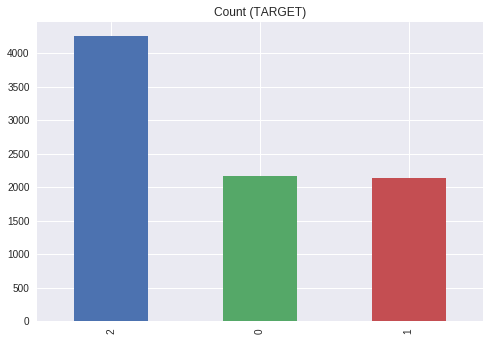

In [0]:
df2_new.y.value_counts().plot(kind='bar', title='Count (TARGET)');

*Dataset* is imbalanced. We have instances with y = 2 in almost twice in quantity compared to the other two. So, we will resample the dataset to balance things out.

In [0]:
from sklearn.utils import resample

In [0]:
df_majority = df2_new[df2_new.y==2]
df_minority_1 = df2_new[df2_new.y==1]
df_minority_0 = df2_new[df2_new.y==0]
 
# Upsample minority class
df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=4253,    # to match majority class
                                 random_state=23) # reproducible results

df_minority_upsampled_0 = resample(df_minority_0, 
                                 replace=True,     # sample with replacement
                                 n_samples=4253,    # to match majority class
                                 random_state=23) # reproducible results
 
 
# Combine majority class with upsampled minority class
df2_new = pd.concat([df_majority, df_minority_upsampled_1])
df2_new = pd.concat([df2_new, df_minority_upsampled_0])
# Display new class counts
df2_new.y.value_counts()

2    4253
1    4253
0    4253
Name: y, dtype: int64

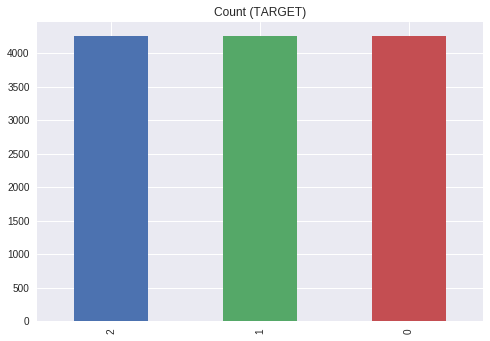

In [0]:
df2_new.y.value_counts().plot(kind='bar', title='Count (TARGET)');

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df2_new, df2_new['y'], train_size=0.8, random_state=43)

In [0]:
pipeline = Pipeline([
        
    ('union', FeatureUnion(
        transformer_list=[
        
            ('age', Pipeline([
                ('selector', ItemSelector('age', as_feature=True))
            ])),
            ('sex', Pipeline([
                ('selector', ItemSelector('sex', as_feature=True))
            ])),    
            ('condition_value_to_avg', Pipeline([
                ('selector', ItemSelector('condition_value_to_avg', as_feature=True))
            ])),
            ('condition_value_from_avg', Pipeline([
                ('selector', ItemSelector('condition_value_from_avg', as_feature=True))
            ])),
            ('symptom_value_to_avg', Pipeline([
                ('selector', ItemSelector('symptom_value_to_avg', as_feature=True))
            ])),
            ('symptom_value_from_avg', Pipeline([
                ('selector', ItemSelector('symptom_value_from_avg', as_feature=True))
            ])),
        ],

    )),

    
    #('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])
	

clf = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print "the accuracy of the model is %.2f%%" % (accuracy_score(y_test, y_pred) * 100) 

the accuracy of the model is 75.86%


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy increased after resampling.

In [0]:

print(df_new.groupby('y').size())

y
0    46600
1    44670
2    95513
dtype: int64


The other dataset is also imbalanced. But because it is larger in dimension, we can downscale it to get equal instances for y = 0, 1 and 2.

In [0]:
df_majority2 = df_new[df_new.y==2]
df_minority2_1 = df_new[df_new.y==1]
df_minority2_0 = df_new[df_new.y==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority2, 
                                 replace=False,    # sample without replacement
                                 n_samples=44670,     # to match minority class
                                 random_state=123) # reproducible results
 
 
# Combine majority class with upsampled minority class
df_new = pd.concat([df_majority_downsampled, df_minority2_1])
df_new = pd.concat([df_new, df_minority2_0])
# Display new class counts
df_new.y.value_counts()



0    46600
2    44670
1    44670
Name: y, dtype: int64

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_new, df_new['y'], train_size=0.8, random_state=41)

In [0]:
pipeline = Pipeline([
        
    ('union', FeatureUnion(
        transformer_list=[
        
            ('age', Pipeline([
                ('selector', ItemSelector('age', as_feature=True))
            ])),
            ('sex', Pipeline([
                ('selector', ItemSelector('sex', as_feature=True))
            ])),    
            ('column_type', Pipeline([
                ('selector', ItemSelector('column_type', as_feature=True))
            ])),
            ('value_difference', Pipeline([
                ('selector', ItemSelector('value_difference', as_feature=True))
            ])),
            
        ],

    )),

    
    #('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])


clf = pipeline.fit(X_train2, y_train2)
y_pred2 = pipeline.predict(X_test2)

print "the accuracy of the model is %.2f%%" % (accuracy_score(y_test2, y_pred2) * 100) 

the accuracy of the model is 42.21%


After resampling the datasets, we got the better accuracy with df_new2 dataset (the one with average values for condition and symptom). This might be an indication that we need a better strategy to incorporate treatment values in our model. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
df2_new.head()

,user_id,checkin_date_from,checkin_date_to,status,value_from,value_to,entries_from,entries_to,age,sex,...,treatment_names_from,treatment_values_from,symptom_names_to,symptom_values_to,treatment_values_to,condition_value_from_avg,condition_value_to_avg,symptom_value_from_avg,symptom_value_to_avg,y
2,2586,6/22/17,6/23/17,SAME,3,3,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",43,1,...,"[Potassium, Magnesium, Cyclobenzaprine, Tramad...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...","[Neck pain, sciatica, left shoulder pain, righ...","[2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, ...","[90 mg, 500.0 mg, 10.0 mg, 50.0 mg, 2x500, 25 ...",0.666667,0.833333,1.304348,1.173913,2
3,312,7/29/17,7/30/17,SAME,2,2,"[{u'trackable_value': u'0', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",23,1,...,"[Vitamin d, Calcium, Vitamin b12, raberprazole...","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...","[Cold Extremities , Hot flushes, Brain fog, sh...","[1, 0, 2, 0, 1, 2]","[400mg, 600mg, 1000mg, 20mg, 2 , 2 , 500mg par...",1.461538,0.692308,1.333333,1.000000,2
6,364,9/17/17,9/18/17,SAME,3,3,"[{u'trackable_value': u'4', u'trackable_type':...","[{u'trackable_value': u'4', u'trackable_type':...",46,1,...,[],[],"[Body pain, Body aching, Poor coordination, Em...","[4, 4, 4, 4, 3, 3, 2, 4, 3, 4, 3, 4, 4, 4, 4, ...",[],4.000000,4.000000,3.450000,3.650000,2
7,9534,5/16/17,5/17/17,SAME,2,2,"[{u'trackable_value': u'1', u'trackable_type':...","[{u'trackable_value': u'1', u'trackable_type':...",45,2,...,"[Tramadol, Savella, Cannabis]","[3 x 50mg, 2 x 100mg, 2 droppers]","[Chest tightness, Racing thoughts, Lower Back ...","[1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 2, 2, 0, 1, 1, ...","[5 x 50mg, 2 x 100mg, 2 droppers]",2.000000,2.000000,1.904762,1.619048,2
11,10097,10/20/17,10/21/17,SAME,3,3,"[{u'trackable_value': u'3', u'trackable_type':...","[{u'trackable_value': u'0', u'trackable_type':...",43,1,...,[],[],"[Right Hip Pain, left hip and pain down leg, f...","[0, 0, 1, 2, 1, 3, 3, 0, 0, 0, 2, 1, 2]",[],2.000000,0.500000,1.615385,1.153846,2


Since df2_new is giving better results, we will proceed with it for now. We will begin by subsetting it with only those features that we are using in our model.

In [0]:
df2_new = df2_new[['age','sex', 'condition_value_from_avg', 'condition_value_to_avg', 'symptom_value_from_avg', 'symptom_value_to_avg', 'y']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df2_new, df2_new['y'], train_size=0.8, random_state=43)

In [0]:
X_train = X_train.drop(columns = ['y'] )
X_test = X_test.drop(columns = ['y'])

In [0]:
X_train.head()

,age,sex,condition_value_from_avg,condition_value_to_avg,symptom_value_from_avg,symptom_value_to_avg
5083,33,1,0.333333,0.333333,1.250000,1.500000
6833,24,3,1.000000,1.333333,2.400000,2.100000
6495,34,1,1.000000,1.500000,0.571429,0.571429
310,32,1,1.500000,3.333333,1.913043,2.608696
5812,43,1,1.000000,0.833333,1.238095,0.809524


In [0]:
X_test.head()

,age,sex,condition_value_from_avg,condition_value_to_avg,symptom_value_from_avg,symptom_value_to_avg
4321,27,1,3.000000,3.000000,1.760000,1.560000
8043,23,1,0.000000,0.500000,0.650000,0.950000
2922,24,1,1.666667,2.000000,2.600000,3.200000
5000,25,1,0.600000,1.000000,2.200000,2.100000
6791,26,3,1.285714,1.285714,1.821429,2.285714


Let's try to run the model one more time for df2_new. We will use Random Forest Classifier with n_estimators = 100

In [0]:

base_model = RandomForestClassifier(n_estimators = 100)
clf = base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

print "the accuracy of the model is %.2f%%" % (accuracy_score(y_test, y_pred) * 100) 

the accuracy of the model is 79.00%


We observed that there is an increase in accuracy. So, lets try to perform cross validation using Grid Search to check if we can improve it further.

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(X_train, y_train)
grid_search.best_params_




y_pred2 = grid_search.predict(X_test)

best_grid = grid_search.best_estimator_
print "the accuracy of the model is %.2f%%" % (accuracy_score(y_test, y_pred2) * 100) 

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 49.5min finished


the accuracy of the model is 73.86%


In [0]:
## best set of parameters for this model

best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

It seems like there was some overfitting in my model as the accuracy reduced after performing cross validation.

### Additional Questions

Please answer the following questions:

1.   If you've explored the data, please describe your observations about the dataset. 
2.   What approach (i.e. modeling & evaluation) did you use?
3.   What features have you tried (please also include the ones that you do not include in your final model)?
4.   What tradeoffs did you consider? Why did you use this approach?
5.   How would you improve your model if you had more time?






---



Some observations about the dataset :



1.   The variable age had negative values
2.   In the json arrays in entries_from and entries_to columns, the sequence of trackable_name were different.
3. trackable_name like depression, anxiety etc were appeared under more than one trackable_type (condition and symptom) making it a weak predictor variable for modeling.
4. Number of entries varies in entries_to and entries_from columns.
5. The trackable_type treatment has highly inconsitent entries in values ranging from dosage of some medication to time spent undergoing some physical activity etc. 
6. The trackable_type weather has different unit for each trackable_name making it inconsistent.

7. The dataset is imbalanced containing almost twice as many instances for y =2 as for the other two.



---





I used various modeling techniques on this dataset such as Naive Bayes, Support Vector Classifier, Logistic Regression, and some tree based models like Decision Tree Classifier, AdaBoost Classifier and Random Forest Classifier.

The models which worked the best were SVC, Decision Tree Classifier and Random Forest Classifier giving almost same accuracy score. But Random Forest was the fastest amongst all.

I also resampled the dataset to deal with imbalance target variable. This surprisingly improved the efficiency of my model and it increased from 50% to 77%.


For evaluation, I splitted the dataset into train and test and then checked the classification accuracy of the predicted label (y) with the test set as it is a very intuitive and efficient way to evaluate the performance of the models.


---



I have two versions of dataset in this code.


1. df_new which has columns for column_type (condition, symptom, treatment), name (containing trackable_name), value_from (noting the value from first date), value_to (noting the value from second date) and value_difference (to note the change in value_from and value_to) for that instance. I started with considering all the features and then realized that name is not a very good feature as it is ambiguous is paired with multiple column_type. After dropping it from the model, the accuracy increased by about 5%. The highest accuracy score I received was 42% for this dataset with above mentioned features. 

2. The second dataset is df2_new. Here I ignored the trackable_type treatment because of the inconsistency of values and proceeded with only condition and symptom. For each user, I found the average of the values_from (values for individual trackable_name noted on first date) and values_to (values for individual trackable_name noted on second date) and used them as features along with age and sex.  This dataset performed better giving the accuracy of 50% which was increased to 79% after resampling. But after performing cross validation, it was reduced to 74% indicating the possibility of overfitting in dataset which was rectified. 

I also used used country and days (days lapsed between the two checkin dates) along with the above mentioned features but later dropped them as they did not add anything to the models.

---



Even after cleaning the treatment type values, they were very different and inconsistent compared to treatment and symptoms. So instead of using them directly for modeling, I used the difference between them (same for other trackable types as well to maintain consistency). even after doing that the difference in treatment values was way higher than the other two. So I selected only those which were in range of -4 to 4. 


Even after this the other dataset which does not contain treatment altogether performed better.

the other feature which was ambiguous was name (trackable_name). So I had to drop it from my model too.



---



I have also not touched the trackable_type weather and could not work with treatment type much too. If i had more time, I would have atleast worked on these.

